<a href="https://colab.research.google.com/github/4ndikaRizaldy/Customer-Chun-Prediction/blob/main/Customer%20Chun%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Studi Case : *Customer Churn*

Perkembangan industri telekomunikasi yang pesat mempengaruhi perilaku masyarakat dalam menggunakan internet untuk berkomunikasi. Sehingga menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya service provider yang menimbulkan persaingan antar provider. Di sisi lain pengguna memiliki hak dalam memilih provider yang sesuai dan beralih dari provider sebelumnya yang diartikan sebagai **Customer Churn**. Peralihan ini menyebabkan berkurangnya pendapatan perusahaan telekomunikasi sehingga perlu ditangani. Dengan demikian, untuk mengatasi permasalahan tersebut dibuat sistem yang **melakukan prediksi costumer churn** agar dapat memetakan strategi bisnis untuk mempertahankan pelanggan.

### Import Dataset

In [ ]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

%matplotlib inline


warnings.filterwarnings('ignore')

In [ ]:
#Dataset untuk train dan test
url1 = "https://archive.org/download/data-train_202403/Data%20Train.csv"
dataset = pd.read_csv(url1)

In [ ]:
#Data untuk validasi
url2 = "https://archive.org/download/data-train_202403/Data%20Test.csv"
validation = pd.read_csv(url2)

In [ ]:
dataset.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
validation.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
dataset.shape

(4250, 20)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
dataset.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### Exploratory Data Analysis (EDA)

In [ ]:
#Barchart
def bar_chart(column, title=None, xlabel=None, ylabel=None):
    count = dataset[column].value_counts()
    index = count.index
    value = count.values

    fig = plt.figure(figsize=(7, 5))
    plt.bar(index, value, color="orange", width=0.5)

    for i, v in enumerate(value):
        plt.text(i, v, str(v), ha='center', va='bottom')

    if title:
      plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.show()

In [ ]:
def pie_chart(column, title=None):
    # Convert 'yes' to 1, 'no' to 0
    converted_data = dataset[column].map({'yes': 1, 'no': 0})

    # Count occurrences of each value
    count = converted_data.value_counts()

    # Get the index (unique values) and values
    index = count.index
    value = count.values

    # Create a pie chart
    fig = plt.figure(figsize=(7, 5))
    plt.pie(value, autopct='%1.1f%%')

    if title:
        plt.title(title)

    plt.show()

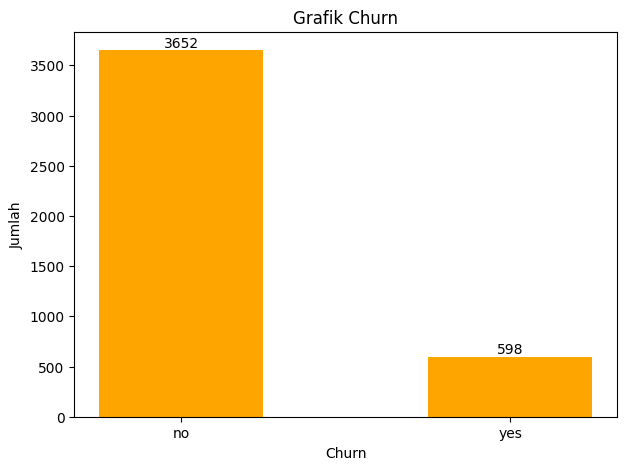

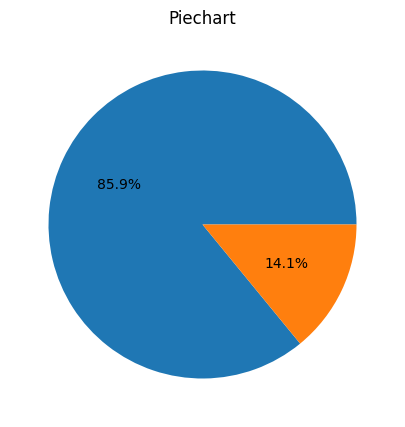

In [ ]:
bar_chart('churn', 'Grafik Churn', 'Churn', 'Jumlah')
pie_chart('churn', 'Piechart')

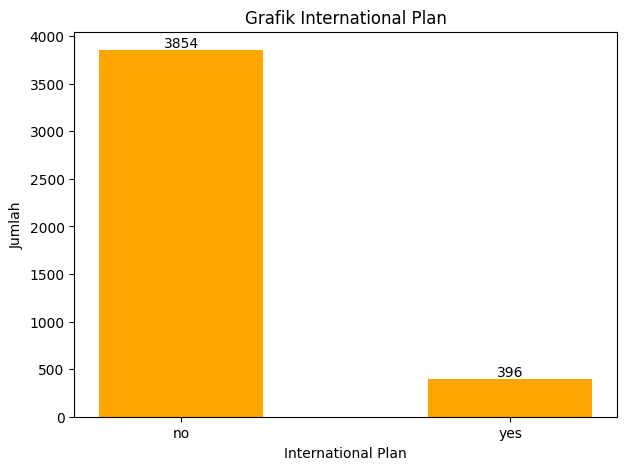

In [ ]:
bar_chart('international_plan', 'Grafik International Plan', 'International Plan', 'Jumlah')

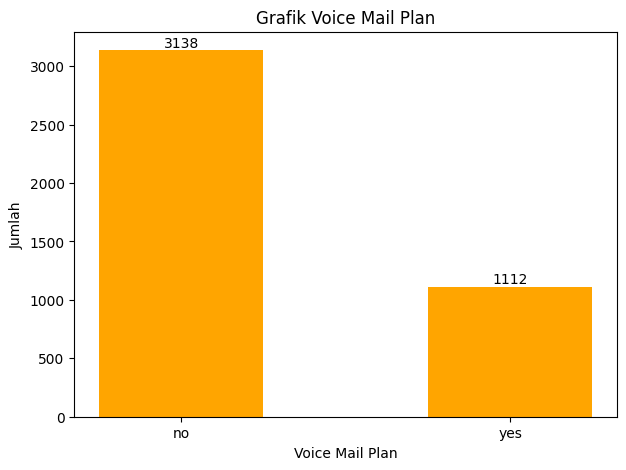

In [ ]:
bar_chart('voice_mail_plan', 'Grafik Voice Mail Plan', 'Voice Mail Plan', 'Jumlah')

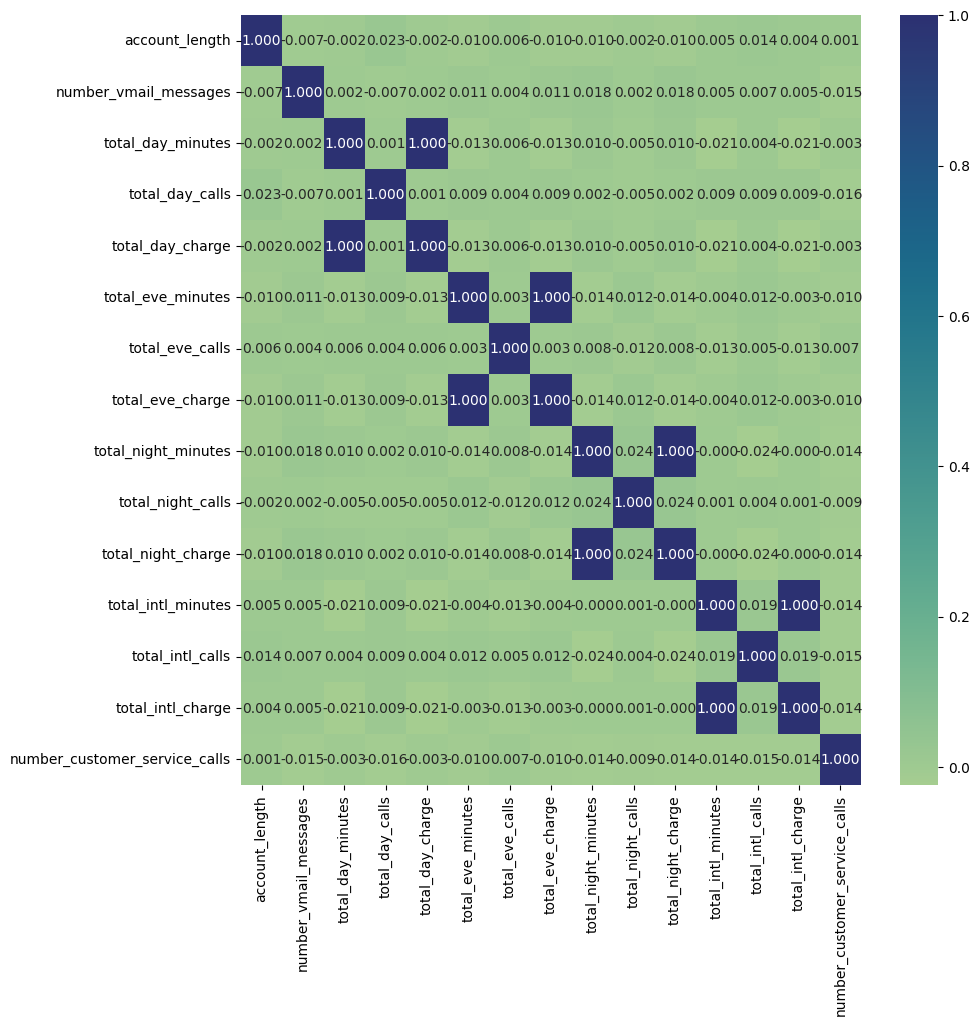

In [ ]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, fmt=".3f", cmap="crest")
plt.show()

Pada heatmap dapat diperhatikan bahwa beberapa variabel terlalu berkorelasi. Diantaranya total_day_minutes dengan total_day_charge, total_night_minutes dengan total_night_charge dan total_intl_minutes dengan total_intl_charge. Hasil ini dapat terjadi karena dependen variabel, sehingga perlu untuk tidak digunakan.

In [ ]:
#histogram
def histogram(column, title=None, xlabel=None, ylabel=None):
  fig, ax = plt.subplots(figsize=(5,3))
  ax.hist(dataset[column], color='maroon')

  if title:
    ax.set_title(title)
  if title:
    ax.set_xlabel(xlabel)
  if title:
    ax.set_ylabel(ylabel)
  plt.show()

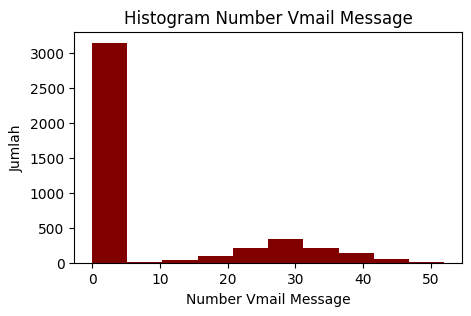

In [ ]:
histogram('number_vmail_messages', 'Histogram Number Vmail Message', 'Number Vmail Message', 'Jumlah')

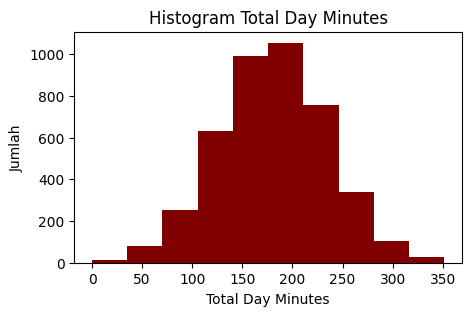

In [ ]:
histogram('total_day_minutes', 'Histogram Total Day Minutes', 'Total Day Minutes', 'Jumlah')

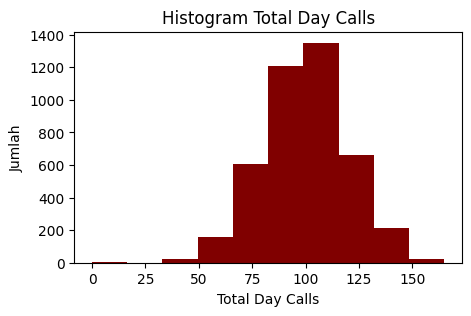

In [ ]:
histogram('total_day_calls', 'Histogram Total Day Calls', 'Total Day Calls', 'Jumlah')

### Pre-Processing

In [ ]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
validation.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
churn = pd.get_dummies(dataset['churn'])

In [ ]:
churn.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
intl_plan = pd.get_dummies(dataset['international_plan'])

In [ ]:
intl_plan.head()

,no,yes
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
voice_mail_plan = pd.get_dummies(dataset['voice_mail_plan'])

In [ ]:
voice_mail_plan.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
dataset = pd.merge(dataset.reset_index(),  churn.reset_index())
dataset['churn'] = dataset['churn'].map({'yes': 1, 'no': 0})
dataset = dataset.drop(['yes', 'no'], axis=1)

In [ ]:
dataset

,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
dataset = pd.merge(dataset.reset_index(),  intl_plan.reset_index())
dataset['international_plan'] = dataset['international_plan'].map({'yes': 1, 'no': 0})
dataset = dataset.drop(['yes', 'no'], axis=1)

In [ ]:
dataset

,level_0,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,OH,107,area_code_415,0,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,1,1,NJ,137,area_code_415,0,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,2,2,OH,84,area_code_408,1,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,3,3,OK,75,area_code_415,1,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,4,4,MA,121,area_code_510,0,yes,24,218.2,88,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,4245,4245,MT,83,area_code_415,0,no,0,188.3,70,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,4246,4246,WV,73,area_code_408,0,no,0,177.9,89,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,4247,4247,NC,75,area_code_408,0,no,0,170.7,101,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,4248,4248,HI,50,area_code_408,0,yes,40,235.7,127,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
voice_mail_plan.reset_index(drop=True, inplace=True)
dataset = pd.merge(dataset, voice_mail_plan, left_index=True, right_index=True)
dataset['voice_mail_plan'] = dataset['voice_mail_plan'].map({'yes': 1, 'no': 0})
dataset = dataset.drop(['yes', 'no'], axis=1)

In [ ]:
dataset

,level_0,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,OH,107,area_code_415,0,1,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,1,1,NJ,137,area_code_415,0,0,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,2,2,OH,84,area_code_408,1,0,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,3,3,OK,75,area_code_415,1,0,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,4,4,MA,121,area_code_510,0,1,24,218.2,88,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,4245,4245,MT,83,area_code_415,0,0,0,188.3,70,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,4246,4246,WV,73,area_code_408,0,0,0,177.9,89,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,4247,4247,NC,75,area_code_408,0,0,0,170.7,101,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,4248,4248,HI,50,area_code_408,0,1,40,235.7,127,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
dataset = dataset.drop(['level_0','index','account_length','index','state', 'area_code', 'total_day_minutes', 'total_eve_minutes','total_night_minutes', 'total_intl_charge'], axis =1)
dataset

,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0,1,26,123,27.47,103,16.62,103,11.45,13.7,3,1,0
1,0,0,0,114,41.38,110,10.30,104,7.32,12.2,5,0,0
2,1,0,0,71,50.90,88,5.26,89,8.86,6.6,7,2,0
3,1,0,0,113,28.34,122,12.61,121,8.41,10.1,3,3,0
4,0,1,24,88,37.09,108,29.62,118,9.57,7.5,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,70,32.01,88,20.72,79,9.62,10.3,6,0,0
4246,0,0,0,89,30.24,82,11.15,89,8.38,11.5,6,3,0
4247,0,0,0,101,29.02,126,16.41,104,5.81,6.9,7,1,0
4248,0,1,40,127,40.07,126,18.96,116,13.39,9.9,5,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4249
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             4250 non-null   int64  
 1   voice_mail_plan                4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_calls                4250 non-null   int64  
 4   total_day_charge               4250 non-null   float64
 5   total_eve_calls                4250 non-null   int64  
 6   total_eve_charge               4250 non-null   float64
 7   total_night_calls              4250 non-null   int64  
 8   total_night_charge             4250 non-null   float64
 9   total_intl_minutes             4250 non-null   float64
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   i

In [ ]:
intl_plan1 = pd.get_dummies(validation['international_plan'])
voice_mail_plan1 = pd.get_dummies(validation['voice_mail_plan'])

validation = pd.merge(validation.reset_index(),  intl_plan1.reset_index())
validation['international_plan'] = validation['international_plan'].map({'yes': 1, 'no': 0})
validation = validation.drop(['yes', 'no'], axis=1)
voice_mail_plan1.reset_index(drop=True, inplace=True)

validation = pd.merge(validation, voice_mail_plan1, left_index=True, right_index=True)
validation['voice_mail_plan'] = validation['voice_mail_plan'].map({'yes': 1, 'no': 0})
validation = validation.drop(['yes', 'no'], axis=1)

In [ ]:
validation

,index,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,KS,128,area_code_415,0,1,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,2,AL,118,area_code_510,1,0,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,2,3,IA,62,area_code_415,0,0,0,120.7,70,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,3,4,VT,93,area_code_510,0,0,0,190.7,114,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,4,5,NE,174,area_code_415,0,0,0,124.3,76,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,745,746,GA,130,area_code_415,0,0,0,119.4,99,...,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,746,747,WA,73,area_code_408,0,0,0,177.2,118,...,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,747,748,WV,152,area_code_415,0,0,0,184.2,90,...,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,748,749,DC,61,area_code_415,0,0,0,140.6,89,...,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
validation = validation.drop(['id','index','account_length','index','state', 'area_code', 'total_day_minutes', 'total_eve_minutes','total_night_minutes', 'total_intl_charge'], axis =1)
validation

,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0,1,25,110,45.07,99,16.78,91,11.01,10.0,3,1
1,1,0,0,98,37.98,101,18.75,118,9.18,6.3,6,0
2,0,0,0,70,20.52,76,26.11,99,9.14,13.1,6,4
3,0,0,0,114,32.42,111,18.55,121,5.83,8.1,3,3
4,0,0,0,76,21.13,112,23.55,115,11.28,15.5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,99,20.30,97,19.24,111,9.12,11.3,7,0
746,0,0,0,118,30.12,84,22.99,112,10.88,12.3,2,3
747,0,0,0,90,31.31,73,21.83,113,9.61,14.7,2,3
748,0,0,0,89,23.90,128,14.69,97,9.56,13.6,4,1


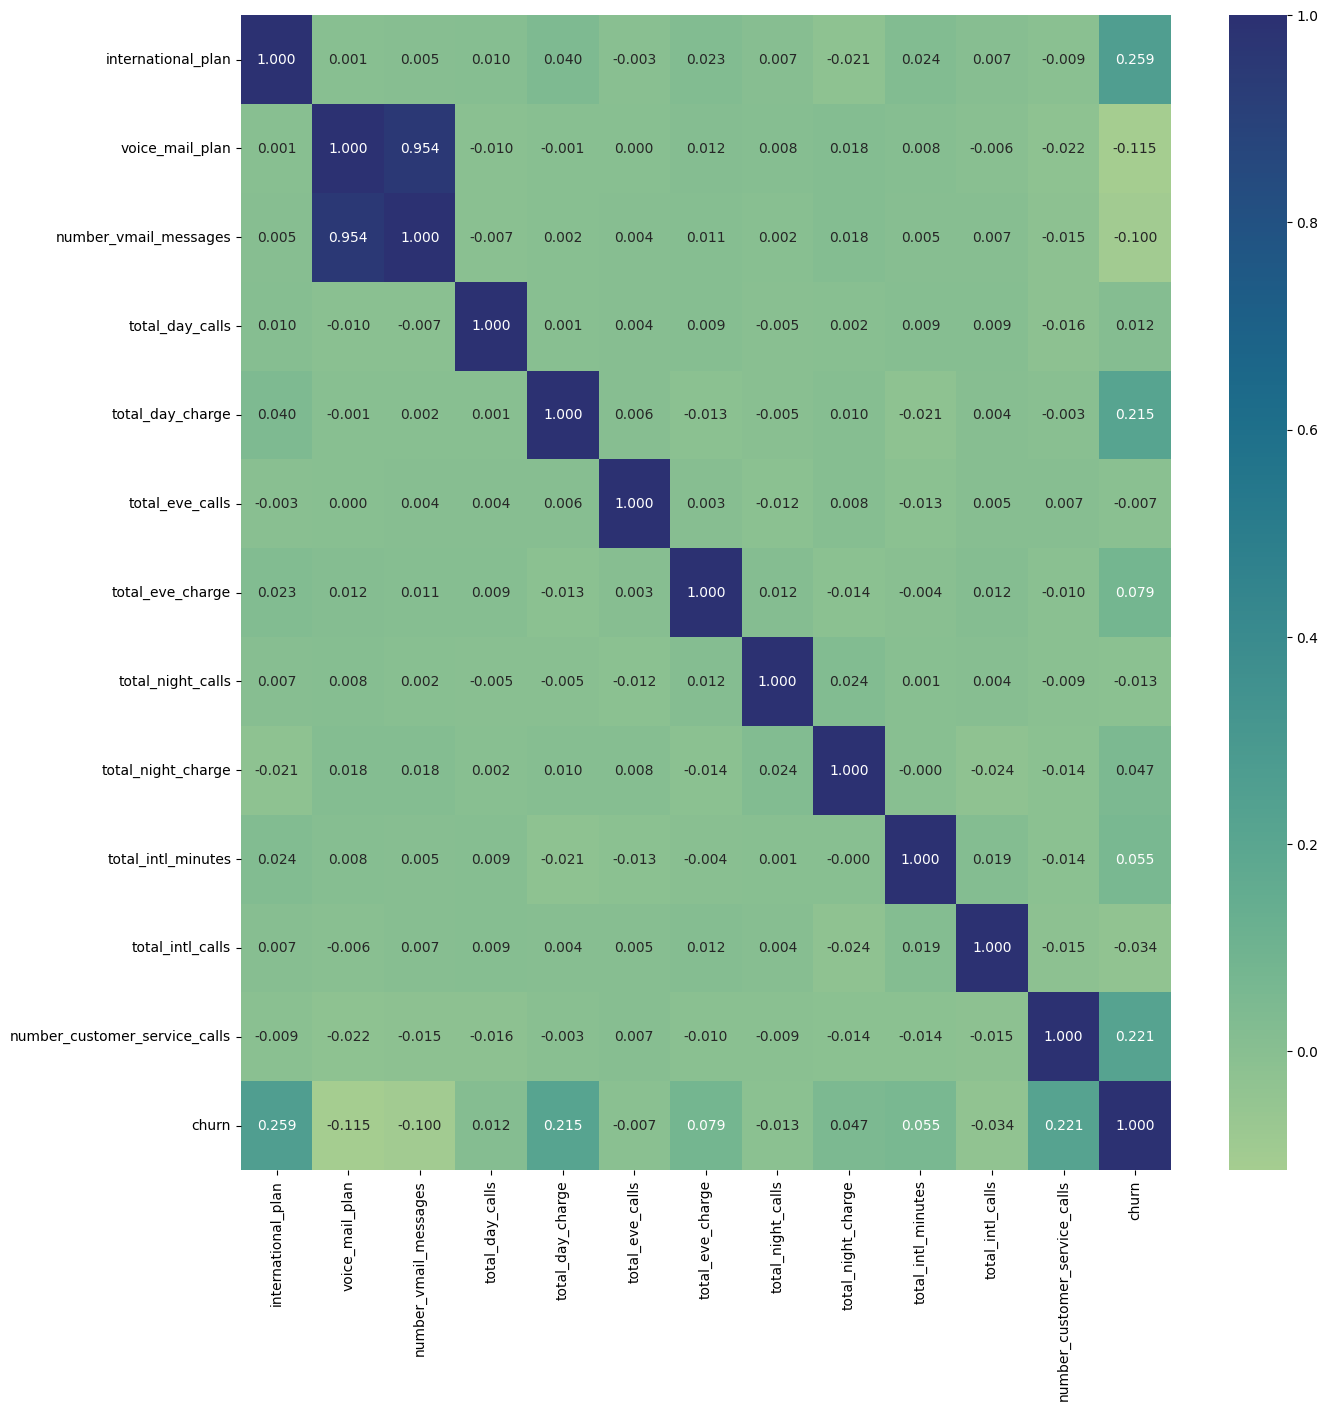

In [ ]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, fmt=".3f", cmap="crest")
plt.show()

In [ ]:
from scipy import stats
import numpy as np

print(f'Jumlah baris sebelum memfilter outlier: {len(dataset)}')

filtered_entries = np.array([True] * len(dataset))
for col in ['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
            'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls',
            'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']:
    zscore = abs(stats.zscore(dataset[col]))
    filtered_entries = (zscore < 3) & filtered_entries

dataset = dataset[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dataset)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3663


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 0 to 4248
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             3663 non-null   int64  
 1   voice_mail_plan                3663 non-null   int64  
 2   number_vmail_messages          3663 non-null   int64  
 3   total_day_calls                3663 non-null   int64  
 4   total_day_charge               3663 non-null   float64
 5   total_eve_calls                3663 non-null   int64  
 6   total_eve_charge               3663 non-null   float64
 7   total_night_calls              3663 non-null   int64  
 8   total_night_charge             3663 non-null   float64
 9   total_intl_minutes             3663 non-null   float64
 10  total_intl_calls               3663 non-null   int64  
 11  number_customer_service_calls  3663 non-null   int64  
 12  churn                          3663 non-null   i

In [ ]:
X = dataset.drop(['churn'], axis=1)
y = dataset['churn']

### Modeling

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### Algoritma KNN

In [ ]:
param_grid = {'n_neighbors':np.arange(1,21)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

Parameter terbaik: {'n_neighbors': 5}
Akurasi Model: 0.8971792538671519


#### Algoritma Decision Tree

In [ ]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dcs_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(dcs_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_dcs_tree = grid_search.best_estimator_

y_pred = best_dcs_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi Model:", accuracy)

Parameter terbaik: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Akurasi Model: 0.9535941765241128


#### Algoritma Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy)

Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Akurasi Model: 0.9481346678798908


### Model Prediction

In [ ]:
#prediksi knn
knn_predik = best_knn.predict(validation)
print(knn_predik)
counts = np.bincount(knn_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#prediksi decision tree
dcs_tree_predik = best_dcs_tree.predict(validation)
print(dcs_tree_predik)
counts = np.bincount(dcs_tree_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#prediksi random forest
rf_predik = best_rf.predict(validation)
print(rf_predik)
counts = np.bincount(rf_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 